In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
from skimage import io

In [2]:
pretrained_model = load_model("./saved_models/weather_acc100.h5")

In [4]:
folder = '/users/gursi/desktop/ml/sample_sets/weather_sample'
items = os.listdir(folder)
images_arr = []

for var1 in items :
    img = image.load_img(folder + '/'+ var1, target_size = (128,128)) 
    img_arr = image.img_to_array(img).copy()
    img_arr = img_arr/255.0
    images_arr.append(img_arr)

In [5]:
model_input = []
for var3 in images_arr :
    model_input.append(var3.reshape(1,128,128,3).copy())

In [6]:
preds = []
classes = ['Cloudy','Rain','Shine','Sunrise']

for var4 in model_input :
    prediction = pretrained_model.predict(var4)
    pred_word = classes[prediction.argmax()]
    preds.append(pred_word)

print(preds)

['Rain', 'Sunrise', 'Cloudy', 'Rain', 'Shine', 'Rain', 'Sunrise', 'Cloudy', 'Shine', 'Sunrise', 'Rain', 'Cloudy', 'Shine', 'Rain', 'Sunrise', 'Rain']


In [7]:
nrows = 0
ncols = 4
while True:
    if nrows*ncols > len(preds):
        break
    nrows = nrows + 1

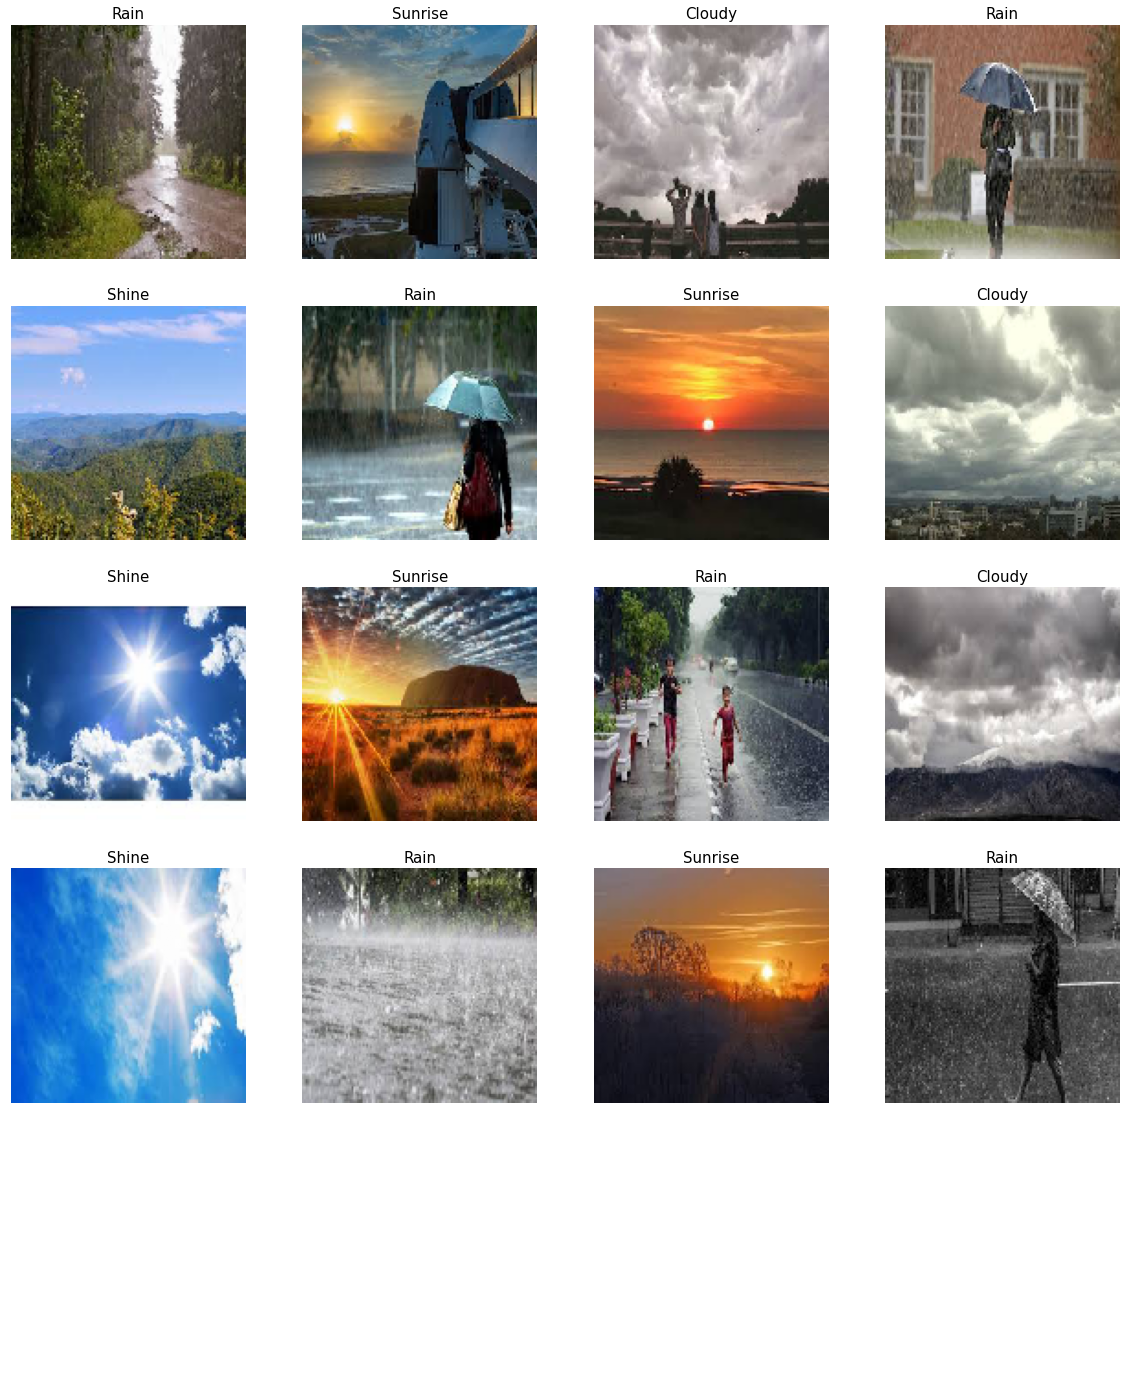

In [8]:
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20,nrows*5))

pic_counter = 0
for var5 in ax :
    for var6 in var5 :
        
        try :
            var6.imshow(images_arr[pic_counter])
            var6.set_title(preds[pic_counter], fontsize = 15)
        except IndexError :
            pass
        
        var6.axis(False)
        pic_counter = pic_counter + 1